In [1]:
from data_generator import *

## Example of parsing active constraints: DC-OPF

In [2]:
org_dir = os.getcwd()
os.chdir('./matpower7.1/')

In [3]:
eng = matlab.engine.start_matlab()

In [4]:
case_name = "pglib_opf_case14_ieee.m"

In [5]:
data = eng.dc_opf_solver(case_name, 0.05)
eng.quit()
os.chdir(org_dir)

In [9]:
data = standardize_data_type(data, "float32")
data

{'bus_info': {'p_d': array([[ 0.       ],
         [23.689766 ],
         [83.56083  ],
         [49.860596 ],
         [ 7.721131 ],
         [10.467694 ],
         [ 0.       ],
         [ 0.       ],
         [34.778137 ],
         [10.246246 ],
         [ 3.2637699],
         [ 7.0256515],
         [13.989648 ],
         [14.8530245]], dtype=float32),
  'bus_idx': array([[ 1.],
         [ 2.],
         [ 3.],
         [ 4.],
         [ 5.],
         [ 6.],
         [ 7.],
         [ 8.],
         [ 9.],
         [10.],
         [11.],
         [12.],
         [13.],
         [14.]], dtype=float32)},
 'gen_info': {'p_g': array([[259.45648],
         [  0.     ],
         [  0.     ],
         [  0.     ],
         [  0.     ]], dtype=float32),
  'p_g_lim': array([[340.,   0.],
         [ 59.,   0.],
         [  0.,   0.],
         [  0.,   0.],
         [  0.,   0.]], dtype=float32),
  'gen2bus': array([[1.],
         [2.],
         [3.],
         [6.],
         [8.]], dtype=float32

In [10]:
data["success_info"]["success"] == 1

True

### an example of feature: x

In [11]:
data["w_info"]["w"]

array([[  0.        ,   1.9897653 , -10.639169  ,   2.0605943 ,
          0.12113079,  -0.73230547,   0.        ,   0.        ,
          5.2781353 ,   1.2462467 ,  -0.23623021,   0.92565167,
          0.48964787,  -0.04697588]], dtype=float32)

### an example of lable: y

In [12]:
gen_active = get_active_gen_constraints(data)
gen_active

array([[0., 0.],
       [0., 1.],
       [0., 0.],
       [0., 0.],
       [0., 0.]], dtype=float32)

In [13]:
flow_active = get_active_flow_constraints(data)
flow_active

array([[0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.]], dtype=float32)

In [14]:
active_constraints = merge_active_constraints(gen_active, flow_active)
active_constraints

array([0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
      dtype=float32)

### a graph representaion of the power system

In [15]:
g = {
    "bus_idx": data["bus_info"]["bus_idx"].squeeze(),
    "fbus2tbus": data["flow_info"]["bus2bus"],
    "gen_bus_idx":data["gen_info"]["gen2bus"]
}

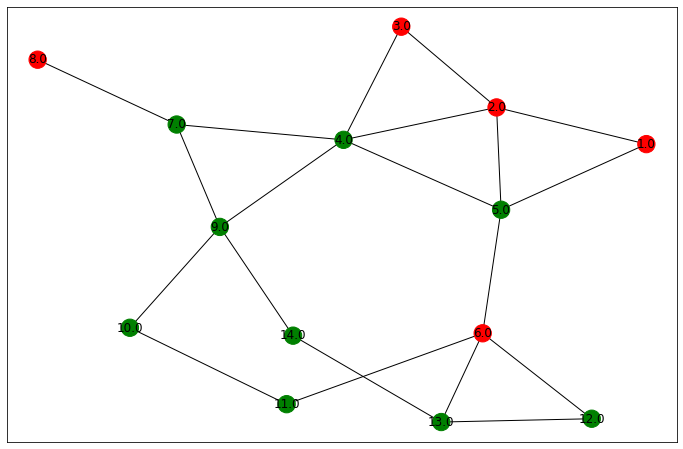

In [16]:
plot_graph(g)

## Build Datasets

### example of creating a dataset
- **x**: uncertainty realization as a feature input
- **y**: active constraints index as a label output

In [17]:
dataset = create_dataset(test_case=case_name, dataset_size=1, std_scaler=0.03)
dataset

> creating dataset with pglib_opf_case14_ieee.m


100%|██████████| 1/1 [00:02<00:00,  2.72s/it]


{'x': array([[ 0.        ,  1.1938591 , -6.383501  ,  1.2363565 ,  0.07267848,
         -0.43938327,  0.        ,  0.        ,  3.1668813 ,  0.747748  ,
         -0.14173813,  0.555391  ,  0.2937887 , -0.02818553]],
       dtype=float32),
 'y': array([[0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0.]], dtype=float32),
 'g': {'bus_idx': array([ 1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11., 12., 13.,
         14.], dtype=float32),
  'fbus2tbus': array([[ 1.,  2.],
         [ 1.,  5.],
         [ 2.,  3.],
         [ 2.,  4.],
         [ 2.,  5.],
         [ 3.,  4.],
         [ 4.,  5.],
         [ 4.,  7.],
         [ 4.,  9.],
         [ 5.,  6.],
         [ 6., 11.],
         [ 6., 12.],
         [ 6., 13.],
         [ 7.,  8.],
         [ 7.,  9.],
         [ 9., 10.],
         [ 9., 14.],
         [1

### generate sample datasets for EDA

- test_type
    - default: base case benchmarks as originally specified
    - api: heavily loaded test cases (i.e. binding thermal limit constraints)
    - sad: small phase angle difference cases (i.e. binding phase angle difference constraints)

In [18]:
test_cases = [
    "pglib_opf_case24_ieee_rts.m",
    "pglib_opf_case30_ieee.m",
    "pglib_opf_case39_epri.m",
    "pglib_opf_case57_ieee.m",
    "pglib_opf_case73_ieee_rts.m",
    "pglib_opf_case89_pegase.m",
    "pglib_opf_case118_ieee.m",
    "pglib_opf_case162_ieee_dtc.m",
    "pglib_opf_case179_goc.m",
    "pglib_opf_case200_activ.m",
    "pglib_opf_case240_pserc.m",
    "pglib_opf_case300_ieee.m",
    "pglib_opf_case500_goc.m",
    "pglib_opf_case588_sdet.m",
    "pglib_opf_case793_goc.m",
    "pglib_opf_case1354_pegase.m",
    "pglib_opf_case1888_rte.m",
    "pglib_opf_case1951_rte.m",
    "pglib_opf_case2000_goc.m",
    "pglib_opf_case2312_goc.m",
    "pglib_opf_case2383wp_k.m",
#     "pglib_opf_case2736sp_k.m",
#     "pglib_opf_case2737sop_k.m",
#     "pglib_opf_case2742_goc.m",
#     "pglib_opf_case2746wop_k.m",
#     "pglib_opf_case2746wop_k.m",
#     "pglib_opf_case2848_rte.m",
]

dataset_size = 100
std_scalers = [0.03, 0.05, 0.07, 0.09, 0.11, 0.13, 0.15]
test_types = ['default', 'api', 'sad']

In [19]:
for std_scaler in std_scalers:
    print("[ {} / {} ]".format(std_scaler, test_types[0]))
    build_datasets(test_cases,
                   dataset_size,
                   std_scaler=std_scaler,
                   test_type=test_types[0])

[ 0.03 / default ]
> creating dataset with pglib_opf_case24_ieee_rts.m


100%|██████████| 100/100 [00:07<00:00, 12.51it/s]


> creating dataset with pglib_opf_case30_ieee.m


100%|██████████| 100/100 [00:07<00:00, 13.16it/s]


> creating dataset with pglib_opf_case39_epri.m


100%|██████████| 100/100 [00:07<00:00, 13.23it/s]


> creating dataset with pglib_opf_case57_ieee.m


100%|██████████| 100/100 [00:07<00:00, 12.63it/s]


> creating dataset with pglib_opf_case73_ieee_rts.m


100%|██████████| 100/100 [00:13<00:00,  7.55it/s]


> creating dataset with pglib_opf_case89_pegase.m


100%|██████████| 100/100 [00:12<00:00,  8.05it/s]


> creating dataset with pglib_opf_case118_ieee.m


100%|██████████| 100/100 [00:09<00:00, 10.57it/s]


> creating dataset with pglib_opf_case162_ieee_dtc.m


100%|██████████| 100/100 [00:10<00:00,  9.29it/s]


> creating dataset with pglib_opf_case179_goc.m


100%|██████████| 100/100 [00:10<00:00,  9.40it/s]


> creating dataset with pglib_opf_case200_activ.m


100%|██████████| 100/100 [00:12<00:00,  8.14it/s]


> creating dataset with pglib_opf_case240_pserc.m


100%|██████████| 100/100 [00:13<00:00,  7.53it/s]


> creating dataset with pglib_opf_case300_ieee.m


100%|██████████| 100/100 [00:12<00:00,  7.83it/s]


> creating dataset with pglib_opf_case500_goc.m


100%|██████████| 100/100 [00:26<00:00,  3.75it/s]


> creating dataset with pglib_opf_case588_sdet.m


100%|██████████| 100/100 [00:17<00:00,  5.72it/s]


> creating dataset with pglib_opf_case793_goc.m


100%|██████████| 100/100 [00:38<00:00,  2.57it/s]


> creating dataset with pglib_opf_case1354_pegase.m


100%|██████████| 100/100 [00:37<00:00,  2.68it/s]


> creating dataset with pglib_opf_case1888_rte.m


100%|██████████| 100/100 [00:46<00:00,  2.15it/s]


> creating dataset with pglib_opf_case1951_rte.m


100%|██████████| 100/100 [00:46<00:00,  2.14it/s]


> creating dataset with pglib_opf_case2000_goc.m


100%|██████████| 100/100 [02:14<00:00,  1.34s/it]


> creating dataset with pglib_opf_case2312_goc.m


100%|██████████| 100/100 [02:23<00:00,  1.43s/it]


> creating dataset with pglib_opf_case2383wp_k.m


100%|██████████| 100/100 [00:56<00:00,  1.77it/s]


[ 0.05 / default ]
> creating dataset with pglib_opf_case24_ieee_rts.m


100%|██████████| 100/100 [00:07<00:00, 12.76it/s]


> creating dataset with pglib_opf_case30_ieee.m


100%|██████████| 100/100 [00:07<00:00, 13.83it/s]


> creating dataset with pglib_opf_case39_epri.m


100%|██████████| 100/100 [00:07<00:00, 13.75it/s]


> creating dataset with pglib_opf_case57_ieee.m


100%|██████████| 100/100 [00:07<00:00, 12.85it/s]


> creating dataset with pglib_opf_case73_ieee_rts.m


100%|██████████| 100/100 [00:12<00:00,  7.97it/s]


> creating dataset with pglib_opf_case89_pegase.m


100%|██████████| 100/100 [00:12<00:00,  7.72it/s]


> creating dataset with pglib_opf_case118_ieee.m


100%|██████████| 100/100 [00:09<00:00, 10.59it/s]


> creating dataset with pglib_opf_case162_ieee_dtc.m


100%|██████████| 100/100 [00:10<00:00,  9.67it/s]


> creating dataset with pglib_opf_case179_goc.m


100%|██████████| 100/100 [00:09<00:00, 10.08it/s]


> creating dataset with pglib_opf_case200_activ.m


100%|██████████| 100/100 [00:11<00:00,  8.69it/s]


> creating dataset with pglib_opf_case240_pserc.m


100%|██████████| 100/100 [00:13<00:00,  7.62it/s]


> creating dataset with pglib_opf_case300_ieee.m


100%|██████████| 100/100 [00:12<00:00,  7.99it/s]


> creating dataset with pglib_opf_case500_goc.m


100%|██████████| 100/100 [00:25<00:00,  3.91it/s]


> creating dataset with pglib_opf_case588_sdet.m


100%|██████████| 100/100 [00:17<00:00,  5.83it/s]


> creating dataset with pglib_opf_case793_goc.m


100%|██████████| 100/100 [00:37<00:00,  2.66it/s]


> creating dataset with pglib_opf_case1354_pegase.m


100%|██████████| 100/100 [00:36<00:00,  2.78it/s]


> creating dataset with pglib_opf_case1888_rte.m


100%|██████████| 100/100 [00:45<00:00,  2.20it/s]


> creating dataset with pglib_opf_case1951_rte.m


100%|██████████| 100/100 [00:46<00:00,  2.16it/s]


> creating dataset with pglib_opf_case2000_goc.m


100%|██████████| 100/100 [02:08<00:00,  1.28s/it]


> creating dataset with pglib_opf_case2312_goc.m


100%|██████████| 100/100 [02:17<00:00,  1.38s/it]


> creating dataset with pglib_opf_case2383wp_k.m


100%|██████████| 100/100 [01:01<00:00,  1.63it/s]


[ 0.07 / default ]
> creating dataset with pglib_opf_case24_ieee_rts.m


100%|██████████| 100/100 [00:07<00:00, 12.68it/s]


> creating dataset with pglib_opf_case30_ieee.m


100%|██████████| 100/100 [00:07<00:00, 13.65it/s]


> creating dataset with pglib_opf_case39_epri.m


100%|██████████| 100/100 [00:07<00:00, 13.44it/s]


> creating dataset with pglib_opf_case57_ieee.m


100%|██████████| 100/100 [00:07<00:00, 12.83it/s]


> creating dataset with pglib_opf_case73_ieee_rts.m


100%|██████████| 100/100 [00:12<00:00,  8.32it/s]


> creating dataset with pglib_opf_case89_pegase.m


100%|██████████| 100/100 [00:13<00:00,  7.52it/s]


> creating dataset with pglib_opf_case118_ieee.m


100%|██████████| 100/100 [00:09<00:00, 10.84it/s]


> creating dataset with pglib_opf_case162_ieee_dtc.m


100%|██████████| 100/100 [00:11<00:00,  9.00it/s]


> creating dataset with pglib_opf_case179_goc.m


100%|██████████| 100/100 [00:09<00:00, 10.05it/s]


> creating dataset with pglib_opf_case200_activ.m


100%|██████████| 100/100 [00:11<00:00,  8.55it/s]


> creating dataset with pglib_opf_case240_pserc.m


100%|██████████| 100/100 [00:14<00:00,  7.05it/s]


> creating dataset with pglib_opf_case300_ieee.m


100%|██████████| 100/100 [00:12<00:00,  7.88it/s]


> creating dataset with pglib_opf_case500_goc.m


100%|██████████| 100/100 [00:26<00:00,  3.81it/s]


> creating dataset with pglib_opf_case588_sdet.m


100%|██████████| 100/100 [00:17<00:00,  5.79it/s]


> creating dataset with pglib_opf_case793_goc.m


100%|██████████| 100/100 [00:39<00:00,  2.52it/s]


> creating dataset with pglib_opf_case1354_pegase.m


100%|██████████| 100/100 [00:38<00:00,  2.62it/s]


> creating dataset with pglib_opf_case1888_rte.m


100%|██████████| 100/100 [00:45<00:00,  2.21it/s]


> creating dataset with pglib_opf_case1951_rte.m


100%|██████████| 100/100 [00:46<00:00,  2.16it/s]


> creating dataset with pglib_opf_case2000_goc.m


100%|██████████| 100/100 [02:10<00:00,  1.30s/it]


> creating dataset with pglib_opf_case2312_goc.m


100%|██████████| 100/100 [02:19<00:00,  1.39s/it]


> creating dataset with pglib_opf_case2383wp_k.m


100%|██████████| 100/100 [01:06<00:00,  1.50it/s]


[ 0.09 / default ]
> creating dataset with pglib_opf_case24_ieee_rts.m


100%|██████████| 100/100 [00:07<00:00, 12.56it/s]


> creating dataset with pglib_opf_case30_ieee.m


100%|██████████| 100/100 [00:07<00:00, 13.69it/s]


> creating dataset with pglib_opf_case39_epri.m


100%|██████████| 100/100 [00:07<00:00, 12.76it/s]


> creating dataset with pglib_opf_case57_ieee.m


100%|██████████| 100/100 [00:07<00:00, 12.52it/s]


> creating dataset with pglib_opf_case73_ieee_rts.m


100%|██████████| 100/100 [00:11<00:00,  8.46it/s]


> creating dataset with pglib_opf_case89_pegase.m


100%|██████████| 100/100 [00:12<00:00,  7.73it/s]


> creating dataset with pglib_opf_case118_ieee.m


100%|██████████| 100/100 [00:09<00:00, 10.89it/s]


> creating dataset with pglib_opf_case162_ieee_dtc.m


100%|██████████| 100/100 [00:11<00:00,  8.50it/s]


> creating dataset with pglib_opf_case179_goc.m


100%|██████████| 100/100 [00:09<00:00, 10.05it/s]


> creating dataset with pglib_opf_case200_activ.m


100%|██████████| 100/100 [00:11<00:00,  8.54it/s]


> creating dataset with pglib_opf_case240_pserc.m


100%|██████████| 100/100 [00:14<00:00,  6.79it/s]


> creating dataset with pglib_opf_case300_ieee.m


100%|██████████| 100/100 [00:12<00:00,  7.92it/s]


> creating dataset with pglib_opf_case500_goc.m


100%|██████████| 100/100 [00:25<00:00,  3.88it/s]


> creating dataset with pglib_opf_case588_sdet.m


100%|██████████| 100/100 [00:16<00:00,  5.94it/s]


> creating dataset with pglib_opf_case793_goc.m


100%|██████████| 100/100 [00:37<00:00,  2.65it/s]


> creating dataset with pglib_opf_case1354_pegase.m


100%|██████████| 100/100 [00:35<00:00,  2.79it/s]


> creating dataset with pglib_opf_case1888_rte.m


100%|██████████| 100/100 [00:44<00:00,  2.26it/s]


> creating dataset with pglib_opf_case1951_rte.m


100%|██████████| 100/100 [00:46<00:00,  2.14it/s]


> creating dataset with pglib_opf_case2000_goc.m


100%|██████████| 100/100 [02:06<00:00,  1.27s/it]


> creating dataset with pglib_opf_case2312_goc.m


100%|██████████| 100/100 [02:17<00:00,  1.38s/it]


> creating dataset with pglib_opf_case2383wp_k.m


100%|██████████| 100/100 [01:14<00:00,  1.34it/s]


[ 0.11 / default ]
> creating dataset with pglib_opf_case24_ieee_rts.m


100%|██████████| 100/100 [00:07<00:00, 12.70it/s]


> creating dataset with pglib_opf_case30_ieee.m


100%|██████████| 100/100 [00:07<00:00, 13.67it/s]


> creating dataset with pglib_opf_case39_epri.m


100%|██████████| 100/100 [00:07<00:00, 13.57it/s]


> creating dataset with pglib_opf_case57_ieee.m


100%|██████████| 100/100 [00:07<00:00, 12.85it/s]


> creating dataset with pglib_opf_case73_ieee_rts.m


100%|██████████| 100/100 [00:11<00:00,  8.81it/s]


> creating dataset with pglib_opf_case89_pegase.m


100%|██████████| 100/100 [00:12<00:00,  7.78it/s]


> creating dataset with pglib_opf_case118_ieee.m


100%|██████████| 100/100 [00:09<00:00, 10.59it/s]


> creating dataset with pglib_opf_case162_ieee_dtc.m


100%|██████████| 100/100 [00:12<00:00,  8.14it/s]


> creating dataset with pglib_opf_case179_goc.m


100%|██████████| 100/100 [00:09<00:00, 10.08it/s]


> creating dataset with pglib_opf_case200_activ.m


100%|██████████| 100/100 [00:11<00:00,  8.65it/s]


> creating dataset with pglib_opf_case240_pserc.m


100%|██████████| 100/100 [00:16<00:00,  6.14it/s]


> creating dataset with pglib_opf_case300_ieee.m


100%|██████████| 100/100 [00:13<00:00,  7.66it/s]


> creating dataset with pglib_opf_case500_goc.m


100%|██████████| 100/100 [00:25<00:00,  3.89it/s]


> creating dataset with pglib_opf_case588_sdet.m


100%|██████████| 100/100 [00:17<00:00,  5.87it/s]


> creating dataset with pglib_opf_case793_goc.m


100%|██████████| 100/100 [00:37<00:00,  2.70it/s]


> creating dataset with pglib_opf_case1354_pegase.m


100%|██████████| 100/100 [00:36<00:00,  2.70it/s]


> creating dataset with pglib_opf_case1888_rte.m


100%|██████████| 100/100 [00:44<00:00,  2.25it/s]


> creating dataset with pglib_opf_case1951_rte.m


100%|██████████| 100/100 [00:46<00:00,  2.17it/s]


> creating dataset with pglib_opf_case2000_goc.m


100%|██████████| 100/100 [02:06<00:00,  1.26s/it]


> creating dataset with pglib_opf_case2312_goc.m


100%|██████████| 100/100 [02:19<00:00,  1.39s/it]


> creating dataset with pglib_opf_case2383wp_k.m


100%|██████████| 100/100 [01:17<00:00,  1.29it/s]


[ 0.13 / default ]
> creating dataset with pglib_opf_case24_ieee_rts.m


100%|██████████| 100/100 [00:07<00:00, 12.76it/s]


> creating dataset with pglib_opf_case30_ieee.m


100%|██████████| 100/100 [00:07<00:00, 13.37it/s]


> creating dataset with pglib_opf_case39_epri.m


100%|██████████| 100/100 [00:07<00:00, 12.87it/s]


> creating dataset with pglib_opf_case57_ieee.m


100%|██████████| 100/100 [00:08<00:00, 12.40it/s]


> creating dataset with pglib_opf_case73_ieee_rts.m


100%|██████████| 100/100 [00:11<00:00,  8.74it/s]


> creating dataset with pglib_opf_case89_pegase.m


100%|██████████| 100/100 [00:13<00:00,  7.41it/s]


> creating dataset with pglib_opf_case118_ieee.m


100%|██████████| 100/100 [00:09<00:00, 10.51it/s]


> creating dataset with pglib_opf_case162_ieee_dtc.m


100%|██████████| 100/100 [00:12<00:00,  7.90it/s]


> creating dataset with pglib_opf_case179_goc.m


100%|██████████| 100/100 [00:10<00:00, 10.00it/s]


> creating dataset with pglib_opf_case200_activ.m


100%|██████████| 100/100 [00:11<00:00,  8.69it/s]


> creating dataset with pglib_opf_case240_pserc.m


100%|██████████| 100/100 [00:16<00:00,  5.89it/s]


> creating dataset with pglib_opf_case300_ieee.m


100%|██████████| 100/100 [00:13<00:00,  7.42it/s]


> creating dataset with pglib_opf_case500_goc.m


100%|██████████| 100/100 [00:25<00:00,  3.87it/s]


> creating dataset with pglib_opf_case588_sdet.m


100%|██████████| 100/100 [00:16<00:00,  5.96it/s]


> creating dataset with pglib_opf_case793_goc.m


100%|██████████| 100/100 [00:36<00:00,  2.71it/s]


> creating dataset with pglib_opf_case1354_pegase.m


100%|██████████| 100/100 [00:37<00:00,  2.70it/s]


> creating dataset with pglib_opf_case1888_rte.m


100%|██████████| 100/100 [00:43<00:00,  2.28it/s]


> creating dataset with pglib_opf_case1951_rte.m


100%|██████████| 100/100 [00:46<00:00,  2.14it/s]


> creating dataset with pglib_opf_case2000_goc.m


100%|██████████| 100/100 [02:05<00:00,  1.25s/it]


> creating dataset with pglib_opf_case2312_goc.m


100%|██████████| 100/100 [02:16<00:00,  1.37s/it]


> creating dataset with pglib_opf_case2383wp_k.m


100%|██████████| 100/100 [01:23<00:00,  1.20it/s]


[ 0.15 / default ]
> creating dataset with pglib_opf_case24_ieee_rts.m


100%|██████████| 100/100 [00:07<00:00, 12.68it/s]


> creating dataset with pglib_opf_case30_ieee.m


100%|██████████| 100/100 [00:07<00:00, 13.30it/s]


> creating dataset with pglib_opf_case39_epri.m


100%|██████████| 100/100 [00:07<00:00, 13.44it/s]


> creating dataset with pglib_opf_case57_ieee.m


100%|██████████| 100/100 [00:07<00:00, 12.96it/s]


> creating dataset with pglib_opf_case73_ieee_rts.m


100%|██████████| 100/100 [00:11<00:00,  8.89it/s]


> creating dataset with pglib_opf_case89_pegase.m


100%|██████████| 100/100 [00:13<00:00,  7.39it/s]


> creating dataset with pglib_opf_case118_ieee.m


100%|██████████| 100/100 [00:09<00:00, 10.82it/s]


> creating dataset with pglib_opf_case162_ieee_dtc.m


100%|██████████| 100/100 [00:13<00:00,  7.67it/s]


> creating dataset with pglib_opf_case179_goc.m


100%|██████████| 100/100 [00:09<00:00, 10.13it/s]


> creating dataset with pglib_opf_case200_activ.m


100%|██████████| 100/100 [00:11<00:00,  8.77it/s]


> creating dataset with pglib_opf_case240_pserc.m


100%|██████████| 100/100 [00:18<00:00,  5.55it/s]


> creating dataset with pglib_opf_case300_ieee.m


100%|██████████| 100/100 [00:14<00:00,  7.06it/s]


> creating dataset with pglib_opf_case500_goc.m


100%|██████████| 100/100 [00:25<00:00,  3.92it/s]


> creating dataset with pglib_opf_case588_sdet.m


100%|██████████| 100/100 [00:16<00:00,  5.89it/s]


> creating dataset with pglib_opf_case793_goc.m


100%|██████████| 100/100 [00:36<00:00,  2.73it/s]


> creating dataset with pglib_opf_case1354_pegase.m


100%|██████████| 100/100 [00:37<00:00,  2.64it/s]


> creating dataset with pglib_opf_case1888_rte.m


100%|██████████| 100/100 [00:44<00:00,  2.27it/s]


> creating dataset with pglib_opf_case1951_rte.m


100%|██████████| 100/100 [00:46<00:00,  2.16it/s]


> creating dataset with pglib_opf_case2000_goc.m


100%|██████████| 100/100 [02:05<00:00,  1.25s/it]


> creating dataset with pglib_opf_case2312_goc.m


100%|██████████| 100/100 [02:17<00:00,  1.37s/it]


> creating dataset with pglib_opf_case2383wp_k.m


100%|██████████| 100/100 [01:31<00:00,  1.09it/s]


In [ ]:
# for test_type in test_types:
#     print("[ {} / {} ]".format(std_scalers[0], test_type))
#     build_datasets(test_cases,
#                    dataset_size,
#                    std_scaler=std_scalers[0],
#                    test_type=test_type)

### do EDA
- [EDA ipynb](https://github.com/jhyun0919/Project_EE394V_SPR2021/blob/main/data/eda.ipynb)

In [20]:
# choose test-cases, std-scaler, test-type based on EDA

test_cases = [
    "pglib_opf_case24_ieee_rts.m",
#     "pglib_opf_case30_ieee.m",
#     "pglib_opf_case39_epri.m",
#     "pglib_opf_case57_ieee.m",
    "pglib_opf_case73_ieee_rts.m",
    "pglib_opf_case89_pegase.m",
    "pglib_opf_case118_ieee.m",
    "pglib_opf_case162_ieee_dtc.m",
    "pglib_opf_case179_goc.m",
#     "pglib_opf_case200_activ.m",
    "pglib_opf_case240_pserc.m",
    "pglib_opf_case300_ieee.m",
#     "pglib_opf_case500_goc.m",
#     "pglib_opf_case588_sdet.m",
#     "pglib_opf_case793_goc.m",
#     "pglib_opf_case1354_pegase.m",
#     "pglib_opf_case1888_rte.m",
#     "pglib_opf_case1951_rte.m",
#     "pglib_opf_case2000_goc.m",
    "pglib_opf_case2312_goc.m",
#     "pglib_opf_case2383wp_k.m",
#     "pglib_opf_case2736sp_k.m",
#     "pglib_opf_case2737sop_k.m",
#     "pglib_opf_case2742_goc.m",
#     "pglib_opf_case2746wop_k.m",
#     "pglib_opf_case2746wop_k.m",
#     "pglib_opf_case2848_rte.m",
]

std_scaler = 0.09
test_type = 'default'

### gernerate datasets based on EDA 

In [ ]:
dataset_size = 50000

build_datasets(test_cases, dataset_size, std_scaler, test_type=test_type)

> creating dataset with pglib_opf_case24_ieee_rts.m


  7%|▋         | 3464/50000 [01:45<22:23, 34.65it/s]